## 1. import and install Dependencies

In [ ]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [64]:
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import time

## 2.checking webcam working corectly

In [65]:
mp_holistic = mp.solutions.holistic # Holistic model / making our detection
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [66]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   # color conversion BGR 2 RGB
    image.flags.writeable = False                    # image is no longer writable
    results = model.process(image)                   # make orediction
    image.flags.writeable = True                     # image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)   # color conversion RGB 2 BGR
    return image, results

In [67]:
def draw_landmarks(image, results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80,255,121), thickness=1, circle_radius=1)
                             )
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80,255,121), thickness=2, circle_radius=2)
                             ) 
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
# cap = cv2.VideoCapture(0)

# # set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         #read feed, frame == image from our webcam, ret == return
#         ret, frame = cap.read()

#         # make detection
#         image, results = mediapipe_detection(frame, holistic)
        
#         # draw landmarks
#         draw_landmarks(image, results)

#         #show to screen
#         cv2.imshow('OpenCV Feed', image)

#         #break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [68]:
len(results.left_hand_landmarks.landmark)

21

In [69]:
frame

array([[[155, 160, 160],
        [153, 159, 158],
        [152, 159, 158],
        ...,
        [134, 130, 126],
        [137, 131, 127],
        [137, 131, 127]],

       [[160, 162, 162],
        [155, 160, 160],
        [154, 161, 161],
        ...,
        [136, 131, 127],
        [137, 131, 127],
        [137, 131, 127]],

       [[162, 164, 164],
        [159, 162, 162],
        [160, 165, 164],
        ...,
        [138, 130, 129],
        [138, 129, 127],
        [137, 128, 126]],

       ...,

       [[ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17],
        ...,
        [163, 154, 138],
        [164, 154, 139],
        [165, 155, 140]],

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [ 17,  17,  17],
        ...,
        [160, 156, 144],
        [159, 155, 142],
        [160, 156, 143]],

       [[ 12,  12,  12],
        [ 16,  16,  16],
        [ 17,  17,  17],
        ...,
        [156, 155, 148],
        [158, 158, 149],
        [163, 163, 153]]

In [70]:
draw_landmarks(frame, results)

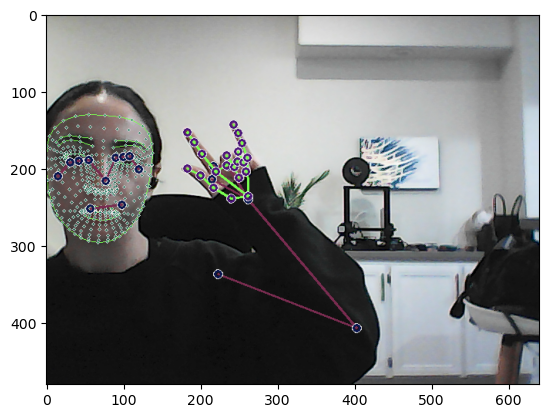

In [71]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3.extract keypoint values

In [72]:
results.face_landmarks

landmark {
  x: 0.11136049032211304
  y: 0.5222464799880981
  z: -0.028501540422439575
}
landmark {
  x: 0.1137324869632721
  y: 0.4749855101108551
  z: -0.053188029676675797
}
landmark {
  x: 0.11240404099225998
  y: 0.48939764499664307
  z: -0.02786758355796337
}
landmark {
  x: 0.10601398348808289
  y: 0.42844605445861816
  z: -0.04070231318473816
}
landmark {
  x: 0.11430535465478897
  y: 0.4606950581073761
  z: -0.056672170758247375
}
landmark {
  x: 0.11461248993873596
  y: 0.4421241283416748
  z: -0.05287612974643707
}
landmark {
  x: 0.11491280049085617
  y: 0.39724987745285034
  z: -0.026205318048596382
}
landmark {
  x: 0.04187338054180145
  y: 0.3889130651950836
  z: 0.009654279798269272
}
landmark {
  x: 0.11582247912883759
  y: 0.36190366744995117
  z: -0.019799143075942993
}
landmark {
  x: 0.11665061116218567
  y: 0.34247052669525146
  z: -0.022158827632665634
}
landmark {
  x: 0.11877930164337158
  y: 0.2741476893424988
  z: -0.011958165094256401
}
landmark {
  x: 0.111

In [73]:
def extract_keypoints(results):
    pose = np.array([([res.x, res.y, res.z, res.visibility]) for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([([res.x, res.y, res.z]) for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([([res.x, res.y, res.z]) for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([([res.x, res.y, res.z]) for res in results.right_hand_landmarks.landmark]).flatten()if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [74]:
result_test = extract_keypoints(results)

In [75]:
result_test

array([ 0.12051947,  0.45163885, -0.9219197 , ...,  0.        ,
        0.        ,  0.        ])

In [76]:
np.save('0', result_test)

## 4.setup folders for collection

In [78]:
#path for exported data
DATA_PATH = os.path.join('MP_Data')


#actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#thirty videos worth of data
no_sequences = 30

#videos are going too be 30 frames in lenght
sequence_lenght = 30

In [43]:
#creating one folder for each actions
#then one folder for each sequence/video from 0 till 29 
#then inside of each we'll have 30 different values

for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. collect keypoint values for Training and Testing

In [44]:
cap = cv2.VideoCapture(0)

# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # loop through actions
    for action in actions:
        #loop through sequences aka videos
        for sequence in range(no_sequences):
            #loop through video lenght aka sequence_lenght
            for frame_num in range(sequence_lenght):
                

                #read feed, frame == image from our webcam, ret == return
                ret, frame = cap.read()

                # make detection
                image, results = mediapipe_detection(frame, holistic)

                # draw landmarks
                draw_landmarks(image, results)
                
                #apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (120, 200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    
                #NEW export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                #show to screen
                cv2.imshow('OpenCV Feed', image)

                #break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [38]:
cap.release()
cv2.destroyAllWindows()

## 6. preprocess data & create labels and features

In [79]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 

In [80]:
label_map = {label:num for num, label in enumerate(actions)}

In [81]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [48]:
# features/videos/x , label/y
sequences, labels = [], [] 
for action in actions:
    for sequence in range(no_sequences):
        
        #represent all af frames for that particular sequence
        window = [] 
        
        #loop through each of 30 frames of each video
        for frame_num in range(sequence_lenght):
            #load up that specific frame
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
            
        sequences.append(window)
        labels.append(label_map[action])
            

In [82]:
np.array(sequences).shape

(90, 30, 1662)

In [83]:
np.array(labels).shape

(90,)

In [84]:
x = np.array(sequences)

In [85]:
x.shape

(90, 30, 1662)

In [86]:
y = to_categorical(labels).astype(int)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [88]:
x_test.shape

(5, 30, 1662)

## 7. build and train LSTM Neural Network

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [91]:
# monitor your training and accuracy as it's being trained
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [94]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [95]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [96]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 8s 82ms/step - loss: 1.6286 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.4130 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1204 - categorical_accuracy: 0.3059
Epoch 4/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0682 - categorical_accuracy: 0.2706
Epoch 5/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0306 - categorical_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.9533 - categorical_accuracy: 0.5059
Epoch 7/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0190 - categorical_accuracy: 0.5647
Epoch 8/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.1143 - categorical_accuracy: 0.3294
Epoch 9/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0854 - categorical_accuracy: 0.4118
E

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

## 8.make prediction

In [100]:
res = model.predict(x_test)

1/1 [==============================] - 0s 38ms/step


In [110]:
actions[np.argmax(res[4])]

'thanks'

## 9. save weights

In [112]:
model.save('action.h5') # saving weights of model so when you load it you dont need to train it again

## 10. evaluation using Confusion Matix and Accuracy

In [113]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [118]:
# prediction on test data
yhat = model.predict(x_train)

3/3 [==============================] - 0s 33ms/step


In [119]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [120]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[53,  3],
        [10, 19]],

       [[57,  1],
        [ 1, 26]],

       [[46, 10],
        [ 3, 26]]], dtype=int64)

In [121]:
accuracy_score(ytrue, yhat)

0.8352941176470589

## 11. test

In [136]:
colors = [(245,117,16), (117,245,16), (16, 117, 245)]
def pob_viz(res, actons, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame
    

In [137]:
# 1.new detection variables
sequence = [] # appending 30 frames of a video to this sequence for predicting the action
sentence = []
threshold = 0.7


cap = cv2.VideoCapture(0)

# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read feed, frame == image from our webcam, ret == return
        ret, frame = cap.read()

        # make detection
        image, results = mediapipe_detection(frame, holistic)
        
        # draw landmarks
        draw_landmarks(image, results)
        
        # 2.prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
        # 3.visual logic
        # res[np.argmax(res)] == action prediction threshold
        
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
                    
            else:
                sentence.append(actions[np.argmax(res)])
                
        if len(sentence) > 5:
            sentence = sentence[-5:]
            
        # vis probabilities
        image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, " ".join(sentence), (3, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        #show to screen
        cv2.imshow('OpenCV Feed', image)

        #break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 39ms/step
hello
1/1 [==============================] - 0s 33ms/step
hello
1/1 [==============================] - 0s 35ms/step
hello
1/1 [==============================] - 0s 39ms/step
hello
1/1 [==============================] - 0s 33ms/step
iloveyou
1/1 [==============================] - 0s 32ms/step
iloveyou
1/1 [==============================] - 0s 28ms/step
iloveyou
1/1 [==============================] - 0s 26ms/step
iloveyou
1/1 [==============================] - 0s 32ms/step
iloveyou
1/1 [==============================] - 0s 33ms/step
iloveyou
1/1 [==============================] - 0s 29ms/step
hello
1/1 [==============================] - 0s 48ms/step
hello
1/1 [==============================] - 0s 37ms/step
hello
1/1 [==============================] - 0s 32ms/step
hello
1/1 [==============================] - 0s 32ms/step
hello
1/1 [==============================] - 0s 40ms/step
hello
1/1 [==============================] - 0s 32ms/step
he

In [126]:
cap.release()
cv2.destroyAllWindows()